In [1]:
%matplotlib inline
import re
import json
import random
import itertools
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from mpl_toolkits.basemap import Basemap

In [2]:
tweets = []
with open("cricket.json",'r') as f:
    for line in f:
        if line != '\n':
            tweets.append(json.loads(line))

In [3]:
# Number of tweets
len(tweets)

15623

In [4]:
tweets[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Oct 29 08:15:03 +0000 2016',
 'entities': {'hashtags': [{'indices': [62, 70], 'text': 'indvsnz'},
   {'indices': [71, 81], 'text': 'ImSarathC'}],
  'symbols': [],
  'urls': [{'display_url': 'fb.me/7OSqRykdL',
    'expanded_url': 'http://fb.me/7OSqRykdL',
    'indices': [82, 105],
    'url': 'https://t.co/g5PVZri5ih'}],
  'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'filter_level': 'low',
 'geo': None,
 'id': 792278562342629376,
 'id_str': '792278562342629376',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://www.facebook.com/twitter" rel="nofollow">Facebook</a>',
 'text': 'India cricketers to play with their mother’s name at the ba

In [5]:
tweets[0].keys()

dict_keys(['coordinates', 'created_at', 'in_reply_to_user_id', 'text', 'id_str', 'in_reply_to_screen_name', 'source', 'contributors', 'in_reply_to_status_id_str', 'user', 'favorite_count', 'lang', 'truncated', 'geo', 'retweeted', 'possibly_sensitive', 'place', 'id', 'timestamp_ms', 'filter_level', 'is_quote_status', 'entities', 'in_reply_to_user_id_str', 'retweet_count', 'in_reply_to_status_id', 'favorited'])

In [6]:
# Extracting location information of tweets and saving in a varial name place
place =[]
for tweet in range(len(tweets)):
    if tweets[tweet]['place'] != None:
        place.append(tweets[tweet]['place'])
    

In [7]:
place[0]

{'attributes': {},
 'bounding_box': {'coordinates': [[[72.74484, 18.845343],
    [72.74484, 19.502937],
    [73.003648, 19.502937],
    [73.003648, 18.845343]]],
  'type': 'Polygon'},
 'country': 'India',
 'country_code': 'IN',
 'full_name': 'Mumbai, India',
 'id': '7929cea6bd5b32bd',
 'name': 'Mumbai',
 'place_type': 'city',
 'url': 'https://api.twitter.com/1.1/geo/id/7929cea6bd5b32bd.json'}

In [8]:
# Since place information is given by four coordinates we average these to convert it to one point.

# Extracting latitude from place to plot on map
latitude = []
for t in range(len(place)):
    sum = 0
    for i in range(4):
        sum += place[t]['bounding_box']['coordinates'][0][i][0]
    latitude.append("{0:.5f}".format(sum/4))
    
# Extracting longitude from place to plot on map
longitude = []
for t in range(len(place)):
    sum = 0
    for i in range(4):
        sum += place[t]['bounding_box']['coordinates'][0][i][1]
    longitude.append("{0:.5f}".format(sum/4))
    
lat = [float (i) for i in latitude ]
lon = [float (i) for i in longitude]

<IPython.core.display.Javascript object>


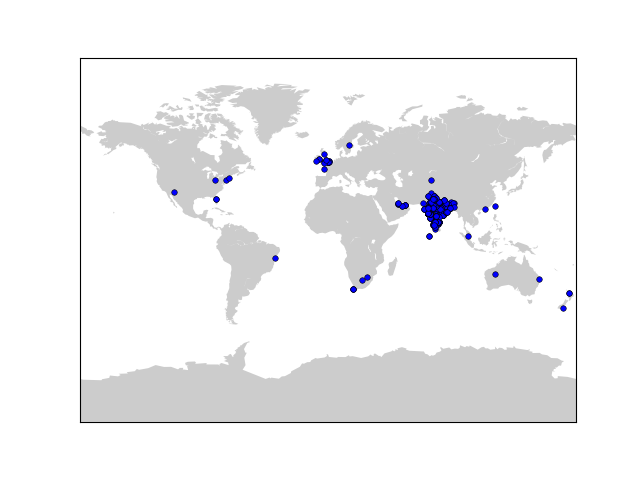

In [9]:
#Plotting of location on map

%matplotlib nbagg
my_map = Basemap(projection= 'mill',lat_0 = 0, lon_0 = 0)
my_map.fillcontinents()
x,y = my_map(lat,lon)
my_map.plot(x,y,'bo',markersize=5)
plt.show()

In [10]:
# Extracting actual tweets

text = []
for tweet in range(len(tweets)):
    text.append(tweets[tweet]['text'])

In [11]:
text[0:10]

['India cricketers to play with their mother’s name at the back\n#indvsnz #ImSarathC https://t.co/g5PVZri5ih',
 'RT @GharwalAnkita: Who will win today ? #indvsNZ',
 "RT @Fukkard: Indian players will wear jerseys with their Mother's name in today's match.\n\n👏👏👏👏👏👏 #indvsnz #Dhoni https://t.co/ohqiBikcad",
 'RT @SirJadeja: Devki Is Mother Of Lord Krishna. Now Waiting For #Presstitutes, Intellectuals &amp; Liberals To Declare #MSDhoni As Com… ',
 'RT @Cricketracker: #INDvsNZ, 5th ODI: IND - 13/0 (3) | Rohit Sharma - 4*(6), Ajinkya Rahane - 9*(12)',
 '#INDvsNZ, 5th ODI: IND - 13/0 (3) | Rohit Sharma - 4*(6), Ajinkya Rahane - 9*(12)',
 'Seems like more buzz on the #ADHM than #indvsnz series decider on twitter and @AnushkaSharma acting than @imVkohli batting.',
 'Virat Kohli at Vizag\r\r118 vs Australia\r117 vs West Indies\r99 vs West Indies\r\rBatting Average: 111.33💃✌ \r#Indvsnz',
 "India's must win game today.....!! India is batting first so  no pressure on kohli and dhoni...!! #indvsNZ"

In [12]:
# Removing 'RT' and URL from the tweets with the help of regular expression

filteredText = []
def regularExpression(textToFilter):

    retweetPattern = 'RT|@RT'
    urlPattern = 'https://[a-zA-Z0-9+&@#/%?=~_|!:,.;]*'

    for textLine in textToFilter:
        tweet = re.sub(retweetPattern,'',textLine)
        tweet = re.sub(urlPattern,'',tweet)
        filteredText.append(tweet)
        
regularExpression(text)

In [13]:
filteredText[0:10]

['India cricketers to play with their mother’s name at the back\n#indvsnz #ImSarathC ',
 ' @GharwalAnkita: Who will win today ? #indvsNZ',
 " @Fukkard: Indian players will wear jerseys with their Mother's name in today's match.\n\n👏👏👏👏👏👏 #indvsnz #Dhoni ",
 ' @SirJadeja: Devki Is Mother Of Lord Krishna. Now Waiting For #Presstitutes, Intellectuals &amp; Liberals To Declare #MSDhoni As Com… ',
 ' @Cricketracker: #INDvsNZ, 5th ODI: IND - 13/0 (3) | Rohit Sharma - 4*(6), Ajinkya Rahane - 9*(12)',
 '#INDvsNZ, 5th ODI: IND - 13/0 (3) | Rohit Sharma - 4*(6), Ajinkya Rahane - 9*(12)',
 'Seems like more buzz on the #ADHM than #indvsnz series decider on twitter and @AnushkaSharma acting than @imVkohli batting.',
 'Virat Kohli at Vizag\r\r118 vs Australia\r117 vs West Indies\r99 vs West Indies\r\rBatting Average: 111.33💃✌ \r#Indvsnz',
 "India's must win game today.....!! India is batting first so  no pressure on kohli and dhoni...!! #indvsNZ",
 " @ViratsArmy: Virat Kohli at Vizag in ODI's\n\nInn

In [14]:
# Extracting hashtags 

hashtag = []
def hashtags(tweet):
    hashtagPattern = re.compile('#[a-zA-Z0-9]*',re.UNICODE)
    
    for t in tweet:
        tags = re.findall(hashtagPattern,t)
        if len(tags) != 0:
            hashtag.append(tags)
        
hashtags(filteredText)

In [15]:
hashtag[0:10]

[['#indvsnz', '#ImSarathC'],
 ['#indvsNZ'],
 ['#indvsnz', '#Dhoni'],
 ['#Presstitutes', '#MSDhoni'],
 ['#INDvsNZ'],
 ['#INDvsNZ'],
 ['#ADHM', '#indvsnz'],
 ['#Indvsnz'],
 ['#indvsNZ'],
 ['#INDvsNZ']]

In [16]:
# Extracting mentioned users 

user = []
def users(tweet):
    usersPattern = re.compile('@[a-zA-Z0-9]*',re.UNICODE)
    
    for t in tweet:
        u = re.findall(usersPattern,t)
        user.append(u)
        
users(filteredText)

In [17]:
user[0:10]

[[],
 ['@GharwalAnkita'],
 ['@Fukkard'],
 ['@SirJadeja'],
 ['@Cricketracker'],
 [],
 ['@AnushkaSharma', '@imVkohli'],
 [],
 [],
 ['@ViratsArmy']]

In [18]:
# Tokenizing words and removing stopwords, hashtags and user mentioned

filteredWords = []
def nltkTokenizer(textToTokenize):
    
    usersPattern = re.compile('@[a-zA-Z0-9]*',re.UNICODE)
    hashtagPattern = re.compile('#[a-zA-Z0-9]*',re.UNICODE)
    stop_words = stopwords.words('english')
    
    for textLine in textToTokenize:
        words = re.sub(usersPattern,'',textLine)
        words = re.sub(hashtagPattern,'',words)
        words = word_tokenize(words)
        for w in words:
            if w not in stop_words and w not in '@' and w not in '#':
                filteredWords.append(w)
    
nltkTokenizer(filteredText)

In [19]:
filteredWords[0:20]

['India',
 'cricketers',
 'play',
 'mother’s',
 'name',
 'back',
 ':',
 'Who',
 'win',
 'today',
 '?',
 ':',
 'Indian',
 'players',
 'wear',
 'jerseys',
 'Mother',
 "'s",
 'name',
 'today']

<IPython.core.display.Javascript object>


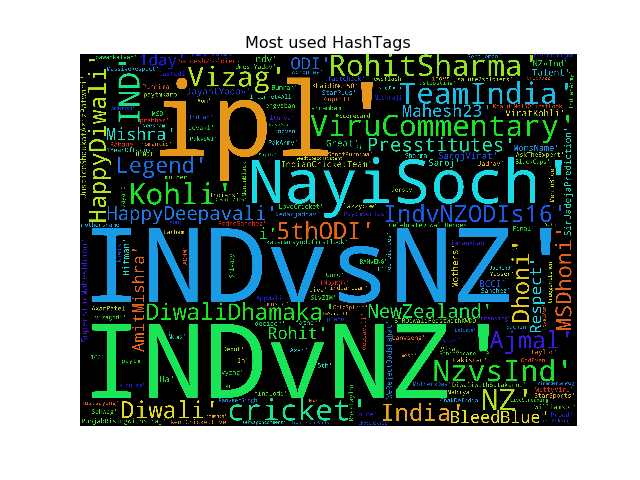

In [20]:
# Since hastag[] is a list of list we are converting it to a single list

str1 = ' '.join(str(e) for e in hashtag)
wordcloud = WordCloud(width= 4000,height= 3000,max_words=200).generate(str1)

%matplotlib nbagg
plt.imshow(wordcloud)
plt.title('Most used HashTags')
plt.axis("off")
plt.show()

<IPython.core.display.Javascript object>


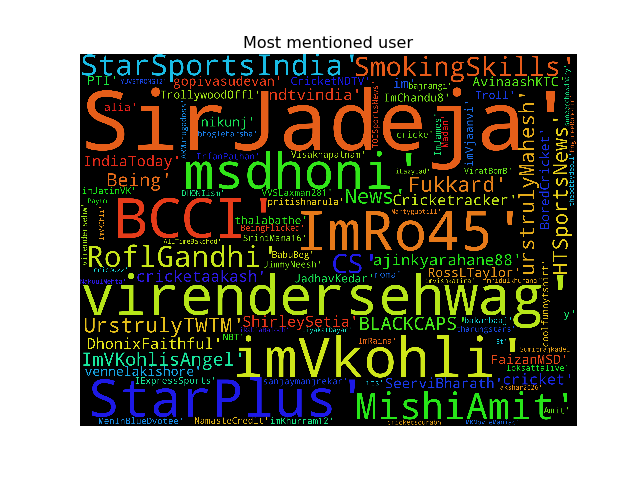

In [21]:
# User[] is also a list of list so we need to convert it to list for further processing
str1 = ' '.join(str(e) for e in user)
wordcloud = WordCloud(width= 4000,height= 3000,max_words=100).generate(str1)

%matplotlib nbagg
plt.imshow(wordcloud)
plt.title('Most mentioned user')
plt.axis("off")
plt.show()

<IPython.core.display.Javascript object>


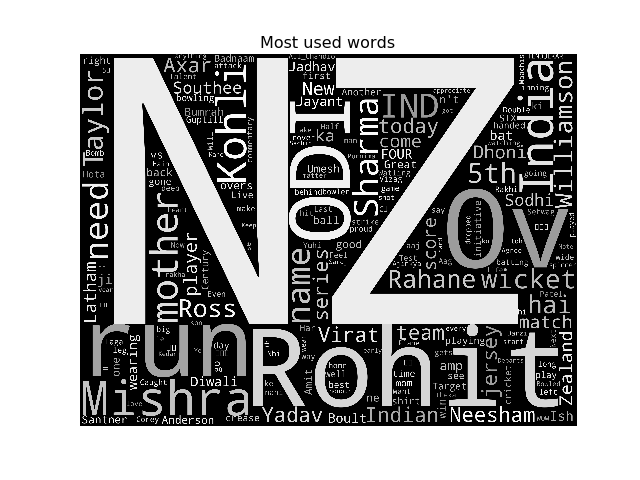

In [22]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

str1 = ' '.join(str(e) for e in filteredWords)

%matplotlib nbagg
wordcloud = WordCloud(width= 4000,height= 3000,max_words=200).generate(str1)
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3))
plt.title('Most used words')
plt.axis("off")
plt.show()

In [23]:
#Extracting device used for tweeting 

source = []
for tweet in range(len(tweets)):
    source.append(tweets[tweet]['source'])
    
pattern = re.compile('>([a-zA-Z ]*)<')
device = []
for i in source:
    match = re.search(pattern,i)
    if match:
        device.append(match.group(1))

In [24]:
device[0:10]

['Facebook',
 'Twitter for Android',
 'Twitter for Android',
 'TweetCaster for Android',
 'Twitter for Android',
 'IFTTT',
 'Twitter for Android',
 'Twitter for Windows Phone',
 'Twitter for Android',
 'Twitter for Android']

In [25]:
# saving device info in a dictionary for having count of each device

device_type = {}
for d in device:
    if d in device_type:
        device_type[d] +=1
    else:
        device_type[d] = 1

In [26]:
# Device type which are used for atleast 200 tweets
device_type = { k : v for k,v in device_type.items() if v > 200}
name = [k for k in device_type if k ]
slices = [v for v in device_type.values()]
device_type

{'IFTTT': 3314,
 'TweetDeck': 332,
 'Twitter Web Client': 1492,
 'Twitter for Android': 7292,
 'Twitter for iPhone': 1648}

<IPython.core.display.Javascript object>


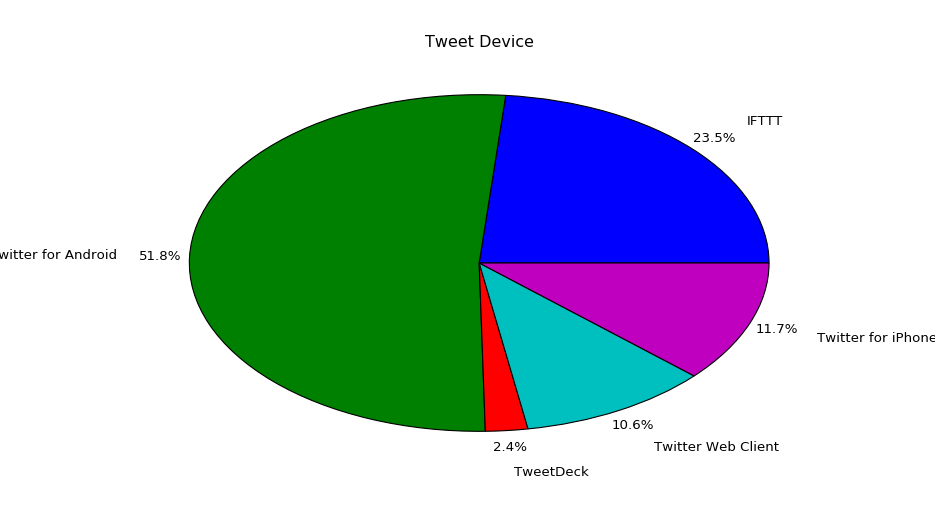

In [27]:
%matplotlib nbagg

plt.pie(slices, labels = name ,autopct= '%1.1f%%',pctdistance=1.1,labeldistance=1.25)
plt.title('Tweet Device')
plt.show()

In [28]:
# Finding the most talked player of Indian team

indianPlayers = {}
newZealandPlayers = {}
# Converting every character to lowercase

newText = []
for i in range(len(text)):
    newText.append(text[i].lower())

In [29]:
for t in newText:
    
    if 'rahane' in t:
        if 'rahane' in indianPlayers:
            indianPlayers['rahane'] +=1
        else:
            indianPlayers['rahane'] = 1
            
            
    if 'rohit' in t or 'r sharma' in t:
        if 'Rohit' in indianPlayers:
            indianPlayers['Rohit'] +=1
        else:
            indianPlayers['Rohit'] = 1
            
            
    if 'virat kohli' in t:
        if 'Virat' in indianPlayers:
            indianPlayers['Virat'] +=1
        else:
            indianPlayers['Virat'] = 1
            
    if 'dhoni' in t:
        if 'Dhoni' in indianPlayers:
            indianPlayers['Dhoni'] +=1
        else:
            indianPlayers['Dhoni'] = 1
            
            
    if 'manish pandey' in t:
        if 'Pandey' in indianPlayers:
            indianPlayers['Pandey'] +=1
        else:
            indianPlayers['Pandey'] = 1
            
            
    if 'jadhav' in t:
        if 'Jadhav' in indianPlayers:
            indianPlayers['Jadhav'] +=1
        else:
            indianPlayers['Jadhav'] = 1
                          
                          
    if 'axar patel' in t:
        if 'Patel' in indianPlayers:
            indianPlayers['Patel'] +=1
        else:
            indianPlayers['Patel'] = 1
            
            
            
    if 'jayant yadav' in t:
        if 'Yadav' in indianPlayers:
            indianPlayers['Yadav'] +=1
        else:
            indianPlayers['Yadav'] = 1
            
            
                              
    if 'amit mishra' in t or 'mishra ji ' in t or 'mishra\'s' in t:
        if 'Mishra' in indianPlayers:
            indianPlayers['Mishra'] +=1
        else:
            indianPlayers['Mishra'] = 1
            
            
                              
    if 'umesh yadav' in t:
        if 'Umesh' in indianPlayers:
            indianPlayers['Umesh'] +=1
        else:
            indianPlayers['Umesh'] = 1
            
            
                              
    if 'bumrah' in t:
        if 'Bumrah' in indianPlayers:
            indianPlayers['Bumrah'] +=1
        else:
            indianPlayers['Bumrah'] = 1
            
            
    if 'guptill' in t:
        if 'Guptill' in newZealandPlayers:
            newZealandPlayers['Guptill'] +=1
        else:
            newZealandPlayers['Guptill'] = 1
            
            
    if 'latham' in t:
        if 'Latham' in newZealandPlayers:
            newZealandPlayers['Latham'] +=1
        else:
            newZealandPlayers['Latham'] = 1
            
            
    if 'kane williamson' in t:
        if 'Williamson' in newZealandPlayers:
            newZealandPlayers['Williamson'] +=1
        else:
            newZealandPlayers['Williamson'] = 1
            
            
    if 'taylor' in t:
        if 'Taylor' in newZealandPlayers:
            newZealandPlayers['Taylor'] +=1
        else:
            newZealandPlayers['Taylor'] = 1
            
            
    if 'james neesham' in t:
        if 'Neesham' in newZealandPlayers:
            newZealandPlayers['Neesham'] +=1
        else:
            newZealandPlayers['Neesham'] = 1
            
            
    if 'watling' in t:
        if 'Watling' in newZealandPlayers:
            newZealandPlayers['Watling'] +=1
        else:
            newZealandPlayers['Watling'] = 1
            
            
    if 'corey anderson' in t:
        if 'Anderson' in newZealandPlayers:
            newZealandPlayers['Anderson'] +=1
        else:
            newZealandPlayers['Anderson'] = 1
            
            
    if 'mitchell santner' in t:
        if 'Santner' in newZealandPlayers:
            newZealandPlayers['Santner'] +=1
        else:
            newZealandPlayers['Santner'] = 1
            
            
    if 'southee' in t:
        if 'Southee' in newZealandPlayers:
            newZealandPlayers['Southee'] +=1
        else:
            newZealandPlayers['Southee'] = 1
            
            
    if 'sodhi' in t:
        if 'Sodhi' in newZealandPlayers:
            newZealandPlayers['Sodhi'] +=1
        else:
            newZealandPlayers['Sodhi'] = 1
            
            
    if 'boult' in t:
        if 'Boult' in newZealandPlayers:
            newZealandPlayers['Boult'] +=1
        else:
            newZealandPlayers['Boult'] = 1
            

In [30]:
indianPlayers

{'Bumrah': 356,
 'Dhoni': 984,
 'Jadhav': 411,
 'Mishra': 484,
 'Pandey': 31,
 'Patel': 101,
 'Rohit': 2815,
 'Umesh': 86,
 'Virat': 610,
 'Yadav': 332,
 'rahane': 940}

In [31]:
newZealandPlayers

{'Anderson': 136,
 'Boult': 389,
 'Guptill': 180,
 'Latham': 456,
 'Neesham': 46,
 'Santner': 51,
 'Sodhi': 448,
 'Southee': 459,
 'Taylor': 1087,
 'Watling': 174,
 'Williamson': 88}

<IPython.core.display.Javascript object>


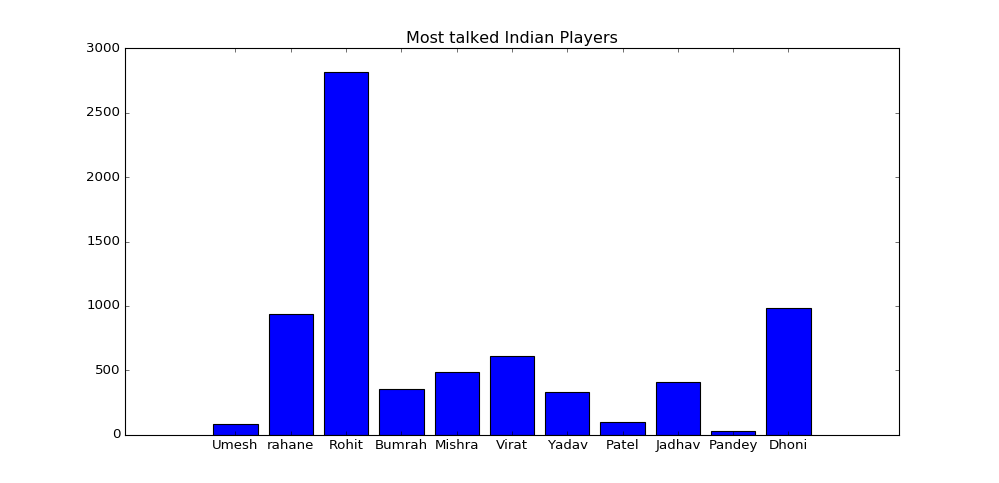

In [32]:
%matplotlib nbagg
plt.bar(range(len(indianPlayers)), indianPlayers.values(), align='center')
plt.xticks(range(len(indianPlayers)), indianPlayers.keys())
plt.title('Most talked Indian Players')
plt.show()

<IPython.core.display.Javascript object>


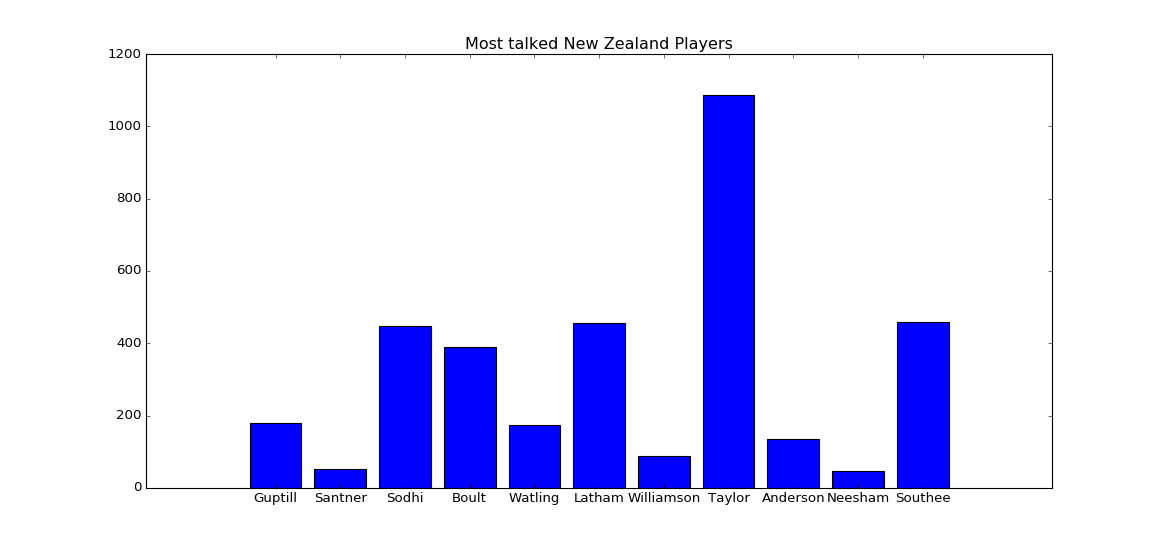

In [33]:
%matplotlib nbagg
plt.bar(range(len(newZealandPlayers)), newZealandPlayers.values(), align='center')
plt.xticks(range(len(newZealandPlayers)), newZealandPlayers.keys())
plt.title('Most talked New Zealand Players')
plt.show()